AdaBoost :-

-> Weak Learners :- weak models whose accuracy is just above 50%
-> Decision Stumps :- It spilts the datapoints into two section, parallel to the either axis.
-> +1 and -1 :- For Decision problems, +1 is used for success and -1 for failure.....instead of 0 and X
Upsampling :- After some weak learner splits the data...the points for which it fail, is given some priority to the next weak learner and this is called upsampling

In this algorithm , We use some weak learners to classify data points and calculate two things, alpha_i and the accuracy h_i(x) at each step.

alpha_i is basically some weight assigned.
alpha = (1/2)*(ln( (1-error)/error) )

error is basically the sum of the weights of all the misclassified points by that learner.( Don't confuse this with alpha, this weight is simply (1/no. of rows of dataset) )

But, after the alpha1 is calculated....we need to increase the weight of the misclassified points so as the next learner will have more priority upon them.
This is done by the following formula :-

for misclassified points :- new_weight = curr_weight * e^(α1)
for correctly classified points :- new_weight = curr_weight * e^(-α1)

Now, the sum of the weights should be 1. So we just normalise the weights by diving each of them with the toal sum of the weights.

After this step, we need to do upsampling.
Upsampling is done using following method:-

According to the weights....generate a prefix range for each row....
0-w1 for R1
w1-w2 for R2
.
.
.
wn-1 - wn for Rn
Then we generate n random values b/w 0 & 1.
And according to those ranges, the new n rows are decided.....in this case a particular row can come multiple times....but due to the more range size of the previously misclassified rows, they have higher probability to occur multiple times.....this completes the process of upsamling...

The whole process is continued untill all the alphas are calculated and then,


The final function for this algorithm becomes
h(x) = &Sigma; αi*h_i(x)

The sign of the Function determines whether the output is +1 or -1 

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [1]:
!pip install mlxtend


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
df = pd.DataFrame()

In [18]:
df['X1'] = [1,2,3,4,5,6,6,7,8,9]
df['X2'] = [5,6,7,3,2,1,4,5,7,9]

df['Label'] = [1,1,1,0,1,0,0,0,1,0]

In [19]:
df

,X1,X2,Label
0,1,5,1
1,2,6,1
2,3,7,1
3,4,3,0
4,5,2,1
5,6,1,0
6,6,4,0
7,7,5,0
8,8,7,1
9,9,9,0


<Axes: xlabel='X1', ylabel='X2'>

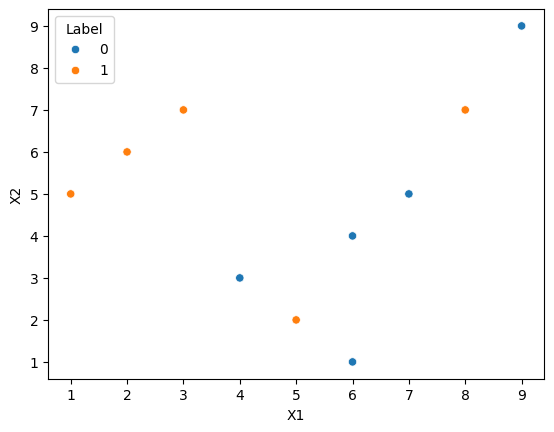

In [20]:
import seaborn as sns
sns.scatterplot(x=df['X1'] , y=df['X2'] , hue=df['Label'])

In [21]:
df['weight'] = 1/df.shape[0]

In [22]:
df

,X1,X2,Label,weight
0,1,5,1,0.1
1,2,6,1,0.1
2,3,7,1,0.1
3,4,3,0,0.1
4,5,2,1,0.1
5,6,1,0,0.1
6,6,4,0,0.1
7,7,5,0,0.1
8,8,7,1,0.1
9,9,9,0,0.1


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [27]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,2].values

In [28]:
dt1.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.625, 0.5, '  False')]

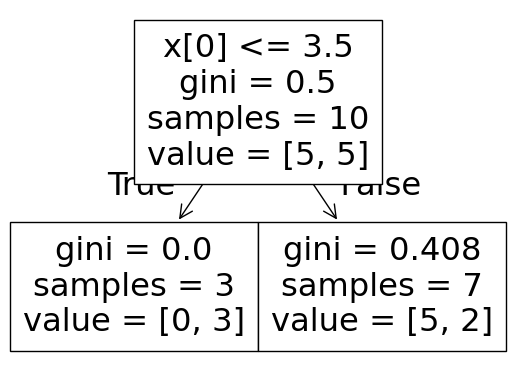

In [29]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

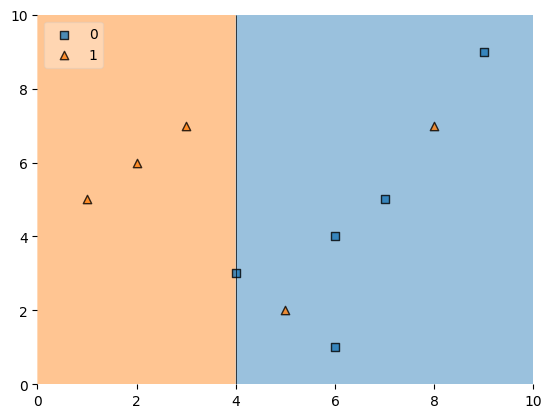

In [30]:
plot_decision_regions(X , Y , clf=dt1 , legend=2)

In [31]:
df['y_pred'] = dt1.predict(X)

In [32]:
df

,X1,X2,Label,weight,y_pred
0,1,5,1,0.1,1
1,2,6,1,0.1,1
2,3,7,1,0.1,1
3,4,3,0,0.1,0
4,5,2,1,0.1,0
5,6,1,0,0.1,0
6,6,4,0,0.1,0
7,7,5,0,0.1,0
8,8,7,1,0.1,0
9,9,9,0,0.1,0


In [54]:
df['weight'].dtype

dtype('float64')

In [58]:
def cal_misClassified_points_error(df):
    return df.loc[df['Label'] != df['y_pred'], 'weight'].sum()

In [61]:
error = cal_misClassified_points_error(df)

In [62]:
def cal_model_weight(error):
    return (0.5)*np.log((1-error)/error)

In [65]:
alpha1 = cal_model_weight(error)
alpha1

np.float64(0.6931471805599453)

In [70]:
# Update Weights
def update_row_weights(row , alpha):
    if row['Label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [71]:
df['weight'] = df.apply(update_row_weights , axis = 1 , alpha=alpha1)

In [72]:
df

,X1,X2,Label,weight,y_pred
0,1,5,1,0.05,1
1,2,6,1,0.05,1
2,3,7,1,0.05,1
3,4,3,0,0.05,0
4,5,2,1,0.20,0
5,6,1,0,0.05,0
6,6,4,0,0.05,0
7,7,5,0,0.05,0
8,8,7,1,0.20,0
9,9,9,0,0.05,0


In [73]:
df['weight'].sum()

np.float64(0.8)

In [74]:
def Normalize(df):
    sum = df['weight'].sum()
    for i in range(0,10):
        df['weight'][i] /= sum

In [75]:
Normalize(df)

C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_4668\3503908610.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['weight'][i] /= sum
C:\Users\gaurav gupta\AppData\Local\Temp\ipykernel_4668\3503908610.py:4: SettingWithCopyWarning: 
A

In [76]:
df

,X1,X2,Label,weight,y_pred
0,1,5,1,0.0625,1
1,2,6,1,0.0625,1
2,3,7,1,0.0625,1
3,4,3,0,0.0625,0
4,5,2,1,0.2500,0
5,6,1,0,0.0625,0
6,6,4,0,0.0625,0
7,7,5,0,0.0625,0
8,8,7,1,0.2500,0
9,9,9,0,0.0625,0


In [77]:
df['weight'].sum()

np.float64(1.0)

In [78]:
df['cumsum_upper'] = np.cumsum(df['weight'])
df['cumsum_lower'] = df['cumsum_upper'] - df['weight']

In [79]:
df

,X1,X2,Label,weight,y_pred,cumsum_upper,cumsum_lower
0,1,5,1,0.0625,1,0.0625,0.0000
1,2,6,1,0.0625,1,0.1250,0.0625
2,3,7,1,0.0625,1,0.1875,0.1250
3,4,3,0,0.0625,0,0.2500,0.1875
4,5,2,1,0.2500,0,0.5000,0.2500
5,6,1,0,0.0625,0,0.5625,0.5000
6,6,4,0,0.0625,0,0.6250,0.5625
7,7,5,0,0.0625,0,0.6875,0.6250
8,8,7,1,0.2500,0,0.9375,0.6875
9,9,9,0,0.0625,0,1.0000,0.9375


In [80]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] >= a and a > row['cumsum_lower']:
                indices.append(index)
    
    return indices

In [81]:
index_values = create_new_dataset(df)
index_values

[0, 2, 7, 4, 5, 1, 1, 8, 8, 2]

In [82]:
df2 = df.iloc[index_values , [0,1,2,3]]

In [83]:
df2

,X1,X2,Label,weight
0,1,5,1,0.0625
2,3,7,1,0.0625
7,7,5,0,0.0625
4,5,2,1,0.2500
5,6,1,0,0.0625
1,2,6,1,0.0625
1,2,6,1,0.0625
8,8,7,1,0.2500
8,8,7,1,0.2500
2,3,7,1,0.0625


In [84]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	./

nothing added to commit but untracked files present (use "git add" to track)
